In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math
# 使图片清晰
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# 修改默认字体
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal'}
plt.rc('font', **font)
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

In [10]:
# 定义全局变量
miu = 0.01 
g = 9.8
m = 70
r = 0.66   # 车轮半径
c = 0.25   # 一个未知系数
w_shoulder = 0.46    # 肩宽
l_leg = 1.0        # 腿长
s = w_shoulder * l_leg   # 人加车正对面积
p = 1.205   # kg/m^3

sigma1 = 42 # 表示有氧呼吸的速率  # sigma2表示无氧呼吸的速率，以函数形式给出
T = 10 # 一个时间

In [11]:
# 阻力函数
f1 = miu*m*g/(2*r)

def f2(v):
    return 1/2*c*p*s*(v)**2

def f(v):
    return f1 + f2(v)

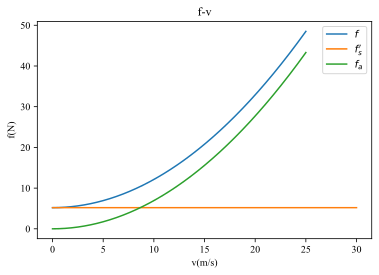

In [12]:
# 阻力-速度图
x = np.linspace(0,25,1000)
y1=f1
y2=f2(x)
y = y1 + y2


plt.figure(1)
plt.plot(x,y,label='$f$')
plt.plot([0, 30],[y1, y1],label="$f_s'$")
plt.plot(x,y2,label='$f_{a}$')
plt.title("f-v")
plt.xlabel("v(m/s)")
plt.ylabel("f(N)")
plt.legend()
plt.show()



测试输出速度为20： 658.239393939394


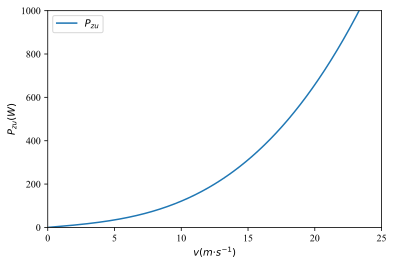

0 0.0
1 5.266257196969697
2 10.948239393939394
3 17.46167159090909
4 25.22227878787879
5 34.64578598484849
6 46.147918181818184
7 60.144400378787886
8 77.05095757575758
9 97.28331477272727
10 121.25719696969696


In [13]:
# %%
# 功率-速度图
# 测试输出
print("测试输出速度为20：",20*(f2(20)+y1))

plt.figure(2)
P_zu = y * x
plt.plot(x,P_zu,label='$P_{zu}$')
plt.xlabel("$v(m · s^{-1})$")
plt.ylabel("$P_{zu}(W)$")
plt.ylim([0,1000])
plt.xlim([0,25])
plt.legend()
plt.show()

# 观察输出
for i in range(11):
    print(i, i*(f2(i)+y1))

In [20]:
import csv

# 1. 创建文件对象
f = open('文件名.csv','w',encoding='utf-8',newline='')

# 2. 基于文件对象构建 csv写入对象
csv_writer = csv.writer(f)

# 3. 构建列表头
csv_writer.writerow(["v","p"])

# 4. 写入csv文件内容
for i in range(len(x)):
    csv_writer.writerow([x[i],round(P_zu[i])])

# 5. 关闭文件
f.close()


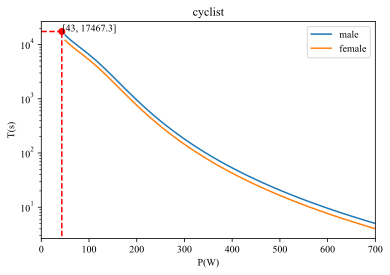

291.1213911235038
50 15016.133561031127
100 6555.730029057573
150 2580.110361107928
200 951.8279300902009
250 389.1572931700424
300 181.09770056306368
350 94.04158845989392
400 53.247472851185485
450 32.2722382350713
500 20.650163634770653
550 13.808104465512777
600 9.574436169531877
650 6.84380393007139
700 5.0198322812544625


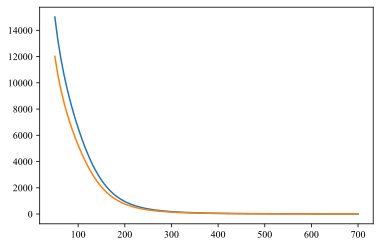

In [113]:
# 刻画人的功率-耐力曲线    T-P曲线
W_max = 2403.5e3  # 最大的功率
alpha = 0.1   # 一个比率

def sigma2(P):       # P是人体功率， v是当前速度
    if P < sigma1:
        return 0
    else:
        return P - sigma1 

def T(P):
    return W_max / ( (2.38969595e-06*(P-sigma1)**3+3.2) *P)

def T_fe(P):
    return W_max * 0.8 / ( (2.38969595e-06*(P-sigma1)**3+3.2) *P)

p = np.linspace(50,700,100)
t = T(p)
t_fe = T_fe(p)
plt.figure(3)


plt.axes(yscale = "log") # 在plot语句前加上该句话即可
plt.title("cyclist")
plt.plot(p,t,label="male")
plt.plot(p,t_fe,label="female")

plt.xlabel("P(W)")
plt.ylabel("T(s)")
plt.xlim(0,700)
plt.plot([0,43],[T(43), T(43)],'r--')
plt.plot([43,43],[0, T(43)],'r--')
plt.scatter([43],[T(43)],facecolor="red")
plt.text(43+1,T(43)+100,"[43, "+str(format(T(43),".1f"))+"]")
plt.legend()
plt.show()
print(T(43)/60)
for i in range(50,701):
    if i % 50 == 0:
        print(i,T(i))


plt.plot(p,t,label="male")
plt.plot(p,t_fe,label="female")
plt.show()


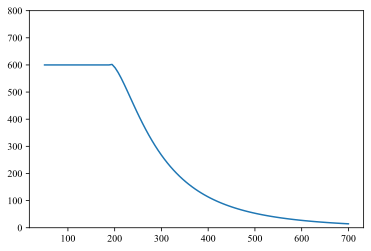

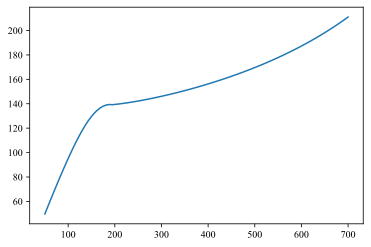

In [114]:
# 要休息的时间
tr=((p-139)*(-9.76562500e-04*p + 1.18359375e+00))/97 * t

for i in range(100):
    if p[i]<188:
        tr[i]=600

plt.plot(p,tr)
plt.ylim(0,800)
plt.show()

# 平均功率
p_a = (42*tr + p * t) / (tr + t)
plt.plot(p,p_a)
plt.show() 

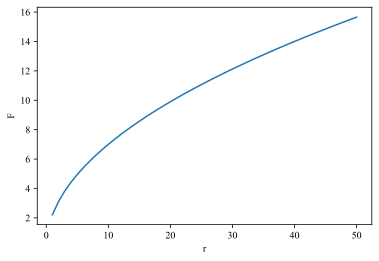

In [115]:
r=np.linspace(1,50)
f = np.sqrt(2)/2*np.sqrt(9.8*r)

plt.plot(r,f)
plt.xlabel("r")
plt.ylabel("F")
plt.show()

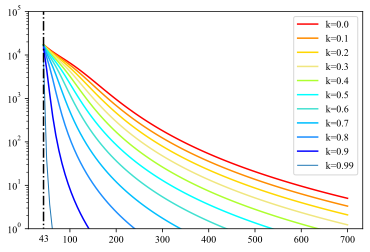

In [118]:
# 根据一组数据
E0 = 2e6 # 总无氧呼吸供能
k = np.linspace(0,0.9,10)
# print(k)
def T_new(P,k):
    return W_max / ( (2.38969595e-06*( (P-sigma1)/(1-k) )**3+3.2) *( (P-sigma1)/(1-k)+sigma1) )

p_new = np.linspace(43,700,100)
plt.figure(4)
plt.axes(yscale = "log") # 在plot语句前加上该句话即可
yy=[]
color=["#ff0000","#ff8c00","#ffd700","#f0e680","#adff2f","#00ffff","#40e0d0","#00bfff","#1e90ff","#0000ff","#191970"]
for i in range(len(k)):
    t_new = T_new(p_new,k[i])
    yy.append(t_new)
    plt.plot(p_new,t_new,color=color[i],label="k="+str(format(k[i], '.1f')))

t_new = T_new(p_new,0.98)
yy.append(t_new)
plt.plot(p_new,t_new,label="k="+str(0.99),lw="1")

plt.plot([43,43],[0,10e5],"k-.")
plt.text(43-10,1-0.5,"43")
plt.ylim(10e-1,10e4)
plt.legend()
# 线之间填充颜色
# for i in range(1):
#     plt.fill_between(p_new,yy[i],yy[i+1],where= yy[i+1]<yy[i],color=color[i])
plt.show()


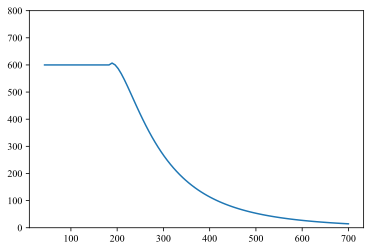

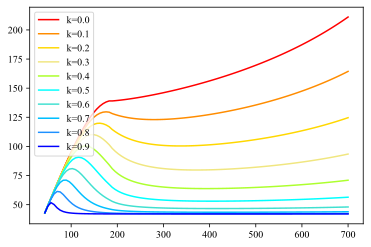

In [120]:
# 要休息的时间

tr=((p_new-139)*(-9.76562500e-04*p_new + 1.18359375e+00))/97 * yy[0]
for i in range(100):
    if p_new[i]<188:
        tr[i]=600
plt.plot(p_new,tr)

plt.ylim(0,800)
plt.show()



# 平均功率
for i in range(10):
    t=yy[i]
    p_a = (42*tr + p_new * t) / (tr + t)
    plt.plot(p_new,p_a,color=color[i],label="k="+str(format(k[i], '.1f')))

# plt.ylim(0,400)
plt.legend()
plt.show()             